# Отрисовка графиков

In [21]:
from tbparse import SummaryReader
log_dir = "path"
reader = SummaryReader(log_dir)
dqn = reader.scalars
log_dir = "path"
reader = SummaryReader(log_dir)
dqn_pro = reader.scalars

In [22]:
def exponential_moving_average(data, alpha):
    ema = np.zeros_like(data)
    ema[0] = data[0]
   
    for i in range(1, len(data)):
        ema[i] = alpha * data[i] + (1 - alpha) * ema[i-1]
   
    return ema

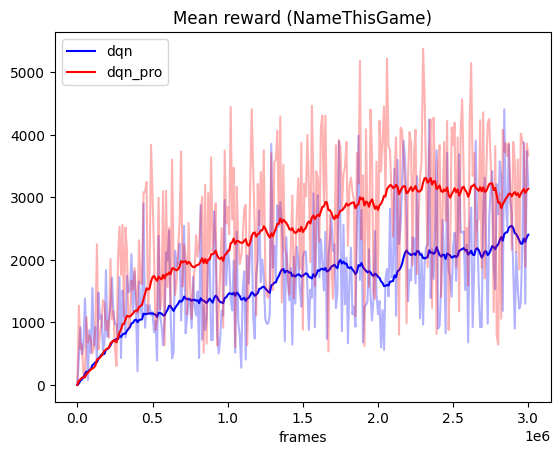

In [4]:
import matplotlib.pyplot as plt

x_dqn = dqn[dqn.tag == 'mean_rw'].step.values
y_dqn = dqn[dqn.tag == 'mean_rw'].value.values
x_dqn_pro = dqn_pro[dqn_pro.tag == 'mean_rw'].step.values
y_dqn_pro = dqn_pro[dqn_pro.tag == 'mean_rw'].value.values


plt.plot(x_dqn, exponential_moving_average(y_dqn, 0.05), c='blue', label='dqn')
plt.plot(x_dqn, y_dqn, c='blue', alpha=0.3)
plt.plot(x_dqn_pro, exponential_moving_average(y_dqn_pro, 0.05), c='red', label='dqn_pro')
plt.plot(x_dqn_pro, y_dqn_pro, c='red', alpha=0.3)
plt.legend()
plt.title('Mean reward (NameThisGame)')
plt.xlabel('frames')
plt.savefig('namethisgame_reward.jpg')
plt.show()

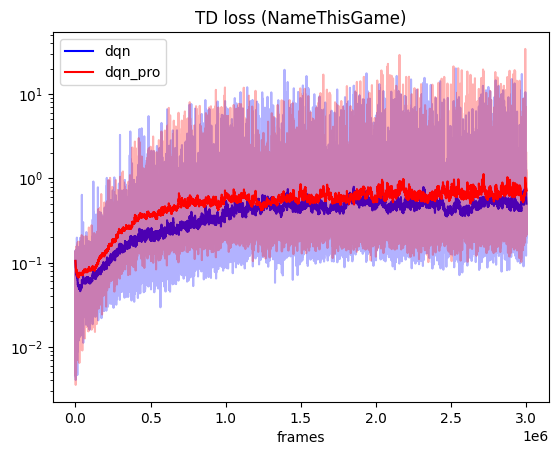

In [5]:
x_dqn = dqn[dqn.tag == 'td_loss'].step.values
y_dqn = dqn[dqn.tag == 'td_loss'].value.values
x_dqn_pro = dqn_pro[dqn_pro.tag == 'td_loss'].step.values
y_dqn_pro = dqn_pro[dqn_pro.tag == 'td_loss'].value.values


plt.semilogy(x_dqn, exponential_moving_average(y_dqn, 0.01), c='blue', label='dqn')
plt.semilogy(x_dqn, y_dqn, c='blue', alpha=0.3)
plt.semilogy(x_dqn_pro, exponential_moving_average(y_dqn_pro, 0.01), c='red', label='dqn_pro')
plt.semilogy(x_dqn_pro, y_dqn_pro, c='red', alpha=0.3)
plt.legend()
plt.title('TD loss (NameThisGame)')
plt.xlabel('frames')
plt.savefig('namethisgame_loss.jpg')
plt.show()

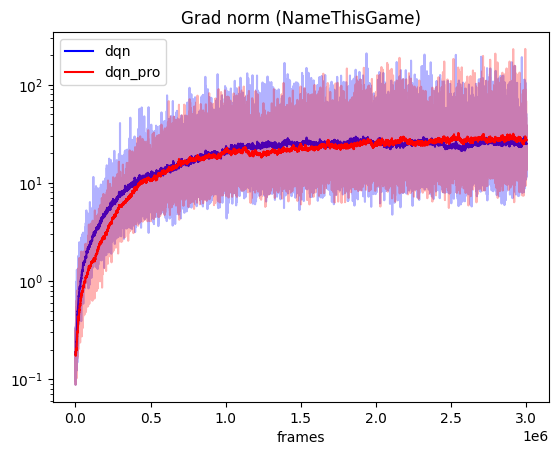

In [6]:
x_dqn = dqn[dqn.tag == 'grad_norm'].step.values
y_dqn = dqn[dqn.tag == 'grad_norm'].value.values
x_dqn_pro = dqn_pro[dqn_pro.tag == 'grad_norm'].step.values
y_dqn_pro = dqn_pro[dqn_pro.tag == 'grad_norm'].value.values


plt.semilogy(x_dqn, exponential_moving_average(y_dqn, 0.01), c='blue', label='dqn')
plt.semilogy(x_dqn, y_dqn, c='blue', alpha=0.3)
plt.semilogy(x_dqn_pro, exponential_moving_average(y_dqn_pro, 0.01), c='red', label='dqn_pro')
plt.semilogy(x_dqn_pro, y_dqn_pro, c='red', alpha=0.3)
plt.legend()
plt.title('Grad norm (NameThisGame)')
plt.xlabel('frames')
plt.savefig('namethisgame_grad_norm.jpg')
plt.show()

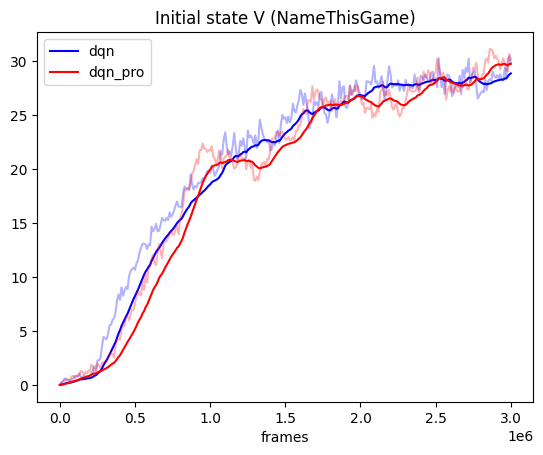

In [23]:
x_dqn = dqn[dqn.tag == 'initial_state_v'].step.values
y_dqn = dqn[dqn.tag == 'initial_state_v'].value.values
x_dqn_pro = dqn_pro[dqn_pro.tag == 'initial_state_v'].step.values
y_dqn_pro = dqn_pro[dqn_pro.tag == 'initial_state_v'].value.values


plt.plot(x_dqn, exponential_moving_average(y_dqn, 0.1), c='blue', label='dqn')
plt.plot(x_dqn, y_dqn, c='blue', alpha=0.3)
plt.plot(x_dqn_pro, exponential_moving_average(y_dqn_pro, 0.1), c='red', label='dqn_pro')
plt.plot(x_dqn_pro, y_dqn_pro, c='red', alpha=0.3)
plt.legend()
plt.title('Initial state V (NameThisGame)')
plt.xlabel('frames')
plt.savefig('namethisgame_initial_state_v.jpg')
plt.show()

# Запись видео

In [11]:
from src.create_env import make_env
from src.dqn_agent import DQNAgent
from src.utils import evaluate
from gymnasium.wrappers import RecordVideo
import torch

env_name = "ALE/SpaceInvaders-v5"
n_lives = 2
seed = 0 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
env = make_env(env_name)
n_actions = env.action_space.n

agent = DQNAgent(n_actions, epsilon=1)
agent.load_state_dict(torch.load("last_agent.pth"))
agent = agent.to(device)

with RecordVideo(env=env, video_folder='./videos',
                 episode_trigger = lambda episode_number: True) as env_monitor:
    sessions = [evaluate(env_monitor,
                         agent,
                         n_games=n_lives,
                         epsilon=0.0,
                         seed=seed) for _ in range(5)]
env.close()

C:\Users\Vlad\AppData\Local\Programs\Python\Python311\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at C:\Users\Vlad\Desktop\Jupyter notebooks\RL\dqn_pro\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
